<a href="https://colab.research.google.com/github/Meenutomar/ML_Projects/blob/develop/Restaurant_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task: Restaurant Recommendation
 Objective: Create a restaurant recommendation
 system based on user preferences.
 Steps:
 Preprocess the dataset by handling missing
 values and encoding categorical variables.
 Determine the criteria for restaurant
 recommendations (e.g., cuisine preference,
 price range).
 Implement a content-based filtering
 approach where users are recommended
 restaurants similar to their preferred criteria.
 Test the recommendation system by
 providing sample user preferences and
 evaluating the quality of recommendations
 help me to complete this task from start to end and save the dataset for further task

#Step 1: Define User Preferences
We need a mechanism to capture user preferences for:

Preferred cuisine.
Preferred city.
Price range.
Minimum acceptable aggregate rating.
#Step 2: Compute Similarities
Using content-based filtering, recommend restaurants that match the user's preferences.



1. Import Libraries and Load Data

In [37]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.table import Table



#Mount Data from Drive

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
dataset = pd.read_csv('/content/drive/MyDrive/data/Cognifyz/Dataset .csv')


#2. Preprocess the Dataset
Handle missing values.
Encode categorical variables.
Normalize numerical features.
python
Copy
Edit


In [51]:
# Handle missing values in 'Cuisines'
dataset['Cuisines'] = dataset['Cuisines'].fillna('Unknown')


# Encode 'City' and 'Cuisines'
label_encoder_city = LabelEncoder()
label_encoder_cuisines = LabelEncoder()
dataset['City_Encoded'] = label_encoder_city.fit_transform(dataset['City'])
dataset['Cuisines_Encoded'] = label_encoder_cuisines.fit_transform(dataset['Cuisines'])

# Normalize 'Average Cost for two'
scaler = MinMaxScaler()
dataset['Average Cost for two (Normalized)'] = scaler.fit_transform(
dataset[['Average Cost for two']])

#3. Define Recommendation Criteria

In [41]:
# User preferences
user_preferences = {
    "Preferred Cuisine": "Japanese",
    "Preferred City": "Makati City",
    "Max Price Range": 3,  # 1 to 4
    "Min Rating": 4.0
}

# Encode user preferences
preferred_cuisine = label_encoder_cuisines.transform([user_preferences["Preferred Cuisine"]])[0]
preferred_city = label_encoder_city.transform([user_preferences["Preferred City"]])[0]
max_price_range = user_preferences["Max Price Range"]
min_rating = user_preferences["Min Rating"]


# Filtering restaurants based on price range and minimum rating

In [42]:
filtered_data = dataset[
    (dataset['Price range'] <= max_price_range) &
    (dataset['Aggregate rating'] >= min_rating)
].copy()  # Use .copy() to avoid SettingWithCopyWarning

# Calculate similarity scores

In [43]:
user_vector = [[preferred_cuisine, preferred_city]]
restaurant_vectors = filtered_data[['Cuisines_Encoded', 'City_Encoded']].values

# Compute cosine similarity

## Adding similarity scores to the filtered data

In [45]:

filtered_data.loc[:, 'Similarity'] = similarities[0]  # Use .loc to avoid warnings

# Sort by similarity and rating
recommendations = filtered_data.sort_values(
    by=['Similarity', 'Aggregate rating'], ascending=[False, False]
)

# Displaying top *recommendations*

In [46]:

top_recommendations = recommendations.head(10)[
    ['Restaurant Name', 'City', 'Cuisines', 'Average Cost for two', 'Aggregate rating']
]
print(top_recommendations)


              Restaurant Name            City  \
1            Izakaya Kikufuji     Makati City   
9392                Roti Chai          London   
5478                  Madaari       New Delhi   
5468    JAIL - Behind The Bar       New Delhi   
6426              Food Scouts       New Delhi   
6705              Food Scouts       New Delhi   
4225              Food Scouts       New Delhi   
4153     The Barbeque Company       New Delhi   
5897      Calendar Khana Laao       New Delhi   
416   Giovanni's Shrimp Truck  Rest of Hawaii   

                                         Cuisines  Average Cost for two  \
1                                        Japanese                  1200   
9392                          Indian, Street Food                    45   
5478  North Indian, Chinese, Continental, Italian                  1200   
5468  North Indian, Chinese, Continental, Italian                  1600   
6426           North Indian, Chinese, Continental                   700   
6705      

#Bar Chart for Aggregate Ratings
This chart will show the restaurant names on the x-axis and their aggregate ratings on the y-axis.

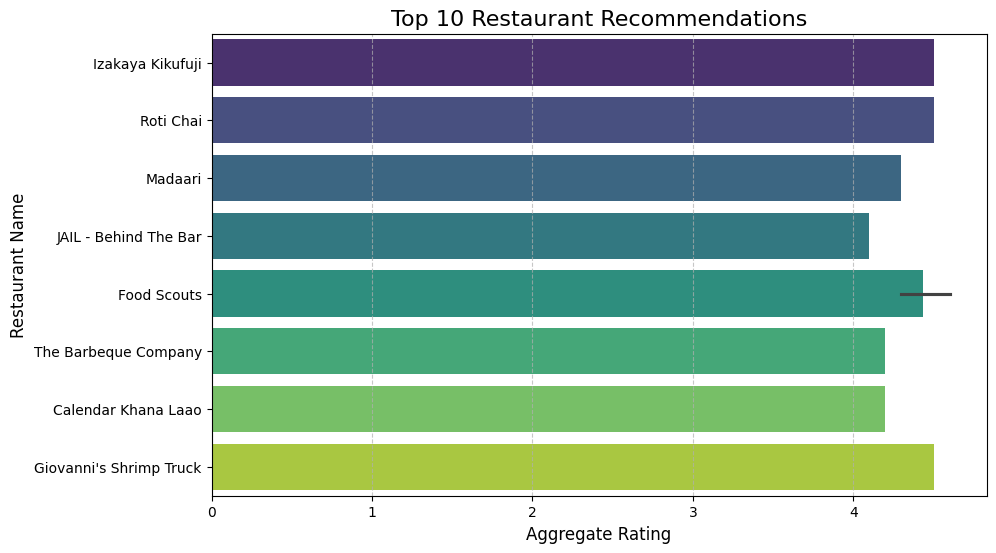

In [47]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_recommendations,
    x='Aggregate rating',
    y='Restaurant Name',
    hue='Restaurant Name',  # Assign 'Restaurant Name' to hue
    dodge=False,  # Avoid separating bars for hue
    palette='viridis',
    legend=False  # Suppress the legend
)

plt.title('Top 10 Restaurant Recommendations', fontsize=16)
plt.xlabel('Aggregate Rating', fontsize=12)
plt.ylabel('Restaurant Name', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


# Table Representation
Using a table to display the data in a structured format.

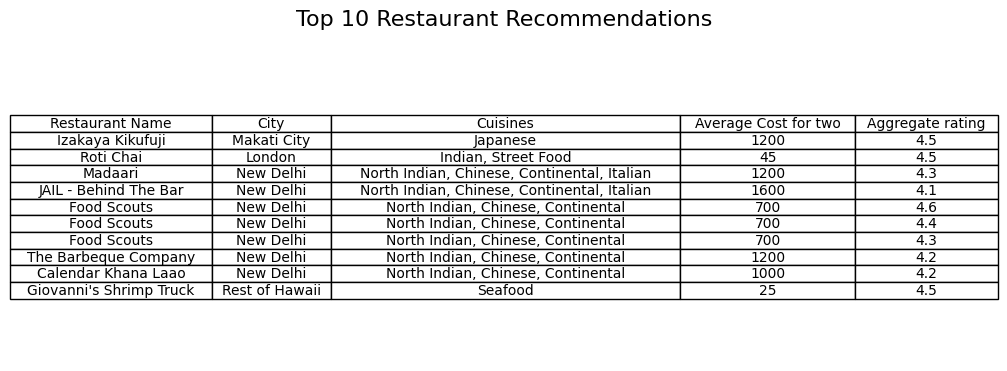

In [48]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('tight')
ax.axis('off')
table_data = top_recommendations.values
columns = top_recommendations.columns
table = ax.table(cellText=table_data, colLabels=columns, loc='center', cellLoc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(columns))))
plt.title('Top 10 Restaurant Recommendations', fontsize=16, pad=20)
plt.show()


##Combined Visuals
Combine both a bar chart and a table for a more comprehensive view.




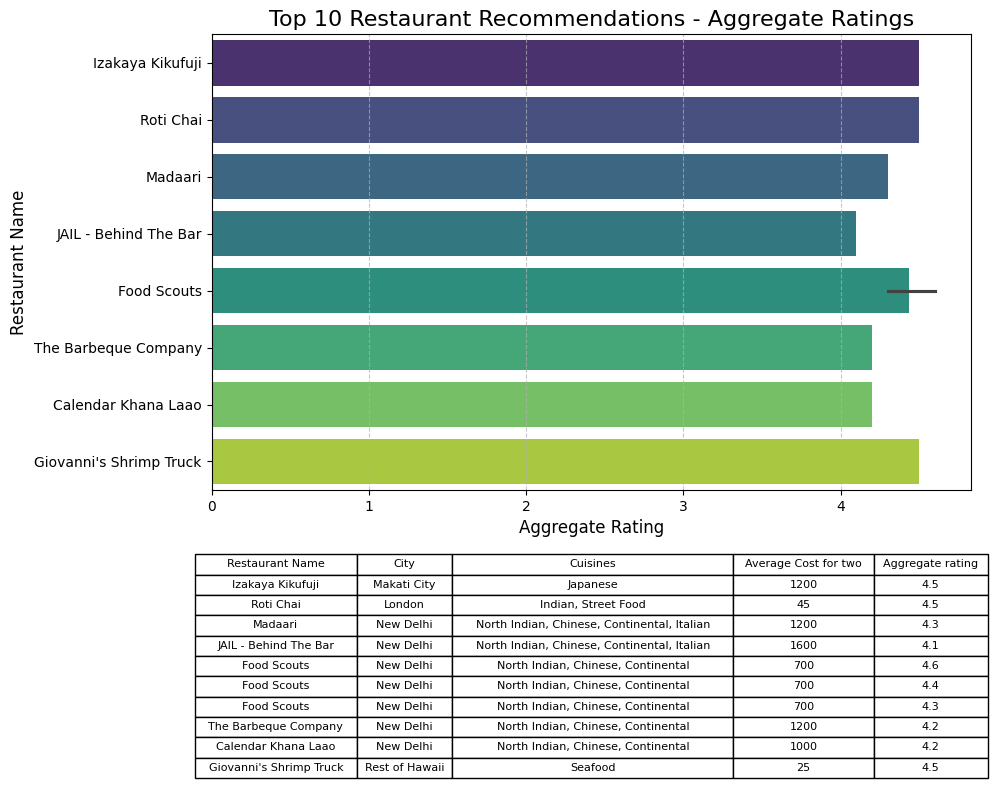

In [49]:
# Extract top 10 recommendations
top_recommendations = recommendations.head(10)[
    ['Restaurant Name', 'City', 'Cuisines', 'Average Cost for two', 'Aggregate rating']
]

# Creating the figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [2, 1]})

# Bar Chart (Top Half)
sns.barplot(
    data=top_recommendations,
    x='Aggregate rating',
    y='Restaurant Name',
    hue='Restaurant Name',
    dodge=False,
    palette='viridis',
    legend=False,

    ax=ax1
)
ax1.set_title('Top 10 Restaurant Recommendations - Aggregate Ratings', fontsize=16)
ax1.set_xlabel('Aggregate Rating', fontsize=12)
ax1.set_ylabel('Restaurant Name', fontsize=12)
ax1.grid(axis='x', linestyle='--', alpha=0.7)

# Table (Bottom Half)
ax2.axis('tight')
ax2.axis('off')
table = ax2.table(
    cellText=top_recommendations.values,
    colLabels=top_recommendations.columns,
    cellLoc='center',
    loc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(8)
table.auto_set_column_width(col=list(range(len(top_recommendations.columns))))

# Adjust layout and show
plt.tight_layout()
plt.show()


#Saving  the Processed Data

In [50]:
# Save processed dataset for future use
processed_file_path = '/content/drive/MyDrive/data/Cognifyz/Dataset .csv'
dataset.to_csv(processed_file_path, index=False)
print(f"Processed dataset saved at: {processed_file_path}")


Processed dataset saved at: /content/drive/MyDrive/data/Cognifyz/Dataset .csv
